In [1]:
import numpy as np
import pandas as pd

Q1. Sales Data Analysis
You are a data analyst at an e-commerce company. Your task is to analyze sales data, clean and process it, perform statistical analysis, and generate visual insights to help the business make informed decisions.

Use your roll number as the random seed to generate unique data for each study

In [2]:
roll_number = 102316005
np.random.seed(roll_number)

Part I: Randomized Sales Data Generation (NumPy)
Initialize Random Seed

Generate Sales Data:

Create a NumPy array of random sales data for 12 months (shape = (12, 4)), where each column represents a product category:
Electronics, Clothing, Home & Kitchen, Sports.
Sales values should be between 1000 and 5000 units per month.
The range should be randomized using the seed.
Convert to DataFrame

Convert the cleaned NumPy array into a Pandas DataFrame with:
Columns: Electronics, Clothing, Home & Kitchen, Sports
Index: Months from Jan to Dec an to Dec

In [3]:
sales = np.random.randint(1000, 5001, size=(12,4))
print(sales)

[[3020 1832 4910 4219]
 [2752 4071 4850 2940]
 [2813 3339 1421 1290]
 [4403 4909 1652 3493]
 [2417 4450 3838 1610]
 [1617 3720 4977 4735]
 [3926 2641 2617 1558]
 [3862 2772 3714 1154]
 [1182 2656 2341 1036]
 [3389 1535 1610 2367]
 [3590 3551 3999 1391]
 [2465 3323 4238 1932]]


In [4]:
months=['jan','feb','mar','apr','may','june','july','aug','sep','oct','nov','dec']
colm = ['electronics','clothing','home & kitchen','sports']
sales_df = pd.DataFrame(sales, columns=colm, index=months)
sales_df

,electronics,clothing,home & kitchen,sports
jan,3020,1832,4910,4219
feb,2752,4071,4850,2940
mar,2813,3339,1421,1290
apr,4403,4909,1652,3493
may,2417,4450,3838,1610
june,1617,3720,4977,4735
july,3926,2641,2617,1558
aug,3862,2772,3714,1154
sep,1182,2656,2341,1036
oct,3389,1535,1610,2367


Part II: Data Manipulation and Analysis
1. Display the First 5 Rows and Summary Statistics
We first examine the initial rows and descriptive statistics of the sales data. This helps us understand the distribution, mean, minimum, maximum, and standard deviation of sales across categories.

2. Calculate Total Sales
Total sales per category are calculated by summing up all sales values in each column.
Total sales per month are calculated by summing across the row (i.e., across all four categories).
This gives us a clear idea of which category and which months performed the best in terms of sales.

3. Average Sales Growth Between Consecutive Months
We calculate the month-to-month percentage change for each category using pct_change(). Then, we find the average of these monthly changes for each product category to understand overall growth trends.

The result is expressed as a percentage.

4. Add Total Sales and Growth Rate Columns
Total Sales: A new column that adds up all four product categories per month.
Growth Rate (%): A new column that calculates the percentage change in Total Sales compared to the previous month.
These new columns help to observe overall sales performance trends.

5. Apply a Randomized Discount
Based on the roll number:

If the roll number is even, we apply a 10% discount to the Electronics category

In [5]:
print(sales_df.head(), '\n')
print(sales_df.describe(), '\n')
print(sales_df.sum(), '\n')
print(sales_df.sum(axis=1))

     electronics  clothing  home & kitchen  sports
jan         3020      1832            4910    4219
feb         2752      4071            4850    2940
mar         2813      3339            1421    1290
apr         4403      4909            1652    3493
may         2417      4450            3838    1610 

       electronics     clothing  home & kitchen       sports
count     12.00000    12.000000       12.000000    12.000000
mean    2953.00000  3233.250000     3347.250000  2310.416667
std      952.63472  1004.166604     1351.707279  1256.521277
min     1182.00000  1535.000000     1421.000000  1036.000000
25%     2453.00000  2652.250000     2168.750000  1365.750000
50%     2916.50000  3331.000000     3776.000000  1771.000000
75%     3658.00000  3807.750000     4391.000000  3078.250000
max     4403.00000  4909.000000     4977.000000  4735.000000 

electronics       35436
clothing          38799
home & kitchen    40167
sports            27725
dtype: int64 

jan     13981
feb     14613
ma

In [6]:
# percantage change
growth = pd.DataFrame(index=sales_df.index, columns=colm)
for c in colm:
    growth[c] = ((sales_df[c]-sales_df[c].shift(1)) / (sales_df[c].shift(1))) *100
print(growth)
# averaging the change
avg_growth = growth.mean()
print('\n' , avg_growth)

      electronics    clothing  home & kitchen      sports
jan           NaN         NaN             NaN         NaN
feb     -8.874172  122.216157       -1.221996  -30.315241
mar      2.216570  -17.980840      -70.701031  -56.122449
apr     56.523285   47.020066       16.256158  170.775194
may    -45.105610   -9.350173      132.324455  -53.907816
june   -33.098883  -16.404494       29.676915  194.099379
july   142.795300  -29.005376      -47.418123  -67.096093
aug     -1.630158    4.960242       41.918227  -25.930680
sep    -69.394096   -4.184704      -36.968228  -10.225303
oct    186.717428  -42.206325      -31.225972  128.474903
nov      5.930953  131.335505      148.385093  -41.233629
dec    -31.337047   -6.420727        5.976494   38.892883

 electronics       18.613052
clothing          16.361757
home & kitchen    17.000181
sports            22.491923
dtype: float64


In [7]:
total_sales_m = sales_df.sum(axis=1)
sales_df['Total_sales']=total_sales_m
print(sales_df)

sales_df['Growth_rate'] = sales_df['Total_sales'].pct_change()*100
print('\n',sales_df)

      electronics  clothing  home & kitchen  sports  Total_sales
jan          3020      1832            4910    4219        13981
feb          2752      4071            4850    2940        14613
mar          2813      3339            1421    1290         8863
apr          4403      4909            1652    3493        14457
may          2417      4450            3838    1610        12315
june         1617      3720            4977    4735        15049
july         3926      2641            2617    1558        10742
aug          3862      2772            3714    1154        11502
sep          1182      2656            2341    1036         7215
oct          3389      1535            1610    2367         8901
nov          3590      3551            3999    1391        12531
dec          2465      3323            4238    1932        11958

       electronics  clothing  home & kitchen  sports  Total_sales  Growth_rate
jan          3020      1832            4910    4219        13981          N

In [8]:
sales_df['clothing (SALE)']=sales_df['clothing']*0.85
print(sales_df)

      electronics  clothing  home & kitchen  sports  Total_sales  Growth_rate  \
jan          3020      1832            4910    4219        13981          NaN   
feb          2752      4071            4850    2940        14613     4.520421   
mar          2813      3339            1421    1290         8863   -39.348525   
apr          4403      4909            1652    3493        14457    63.116326   
may          2417      4450            3838    1610        12315   -14.816352   
june         1617      3720            4977    4735        15049    22.200568   
july         3926      2641            2617    1558        10742   -28.619842   
aug          3862      2772            3714    1154        11502     7.075033   
sep          1182      2656            2341    1036         7215   -37.271779   
oct          3389      1535            1610    2367         8901    23.367983   
nov          3590      3551            3999    1391        12531    40.781935   
dec          2465      3323 

Part III: VisualizaƟons (Matplotlib and Seaborn)
1. Plot monthly sales trends for each category using line plots.
2. Create the following plots:
- Box plots to show the sales distribuƟon for each category.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

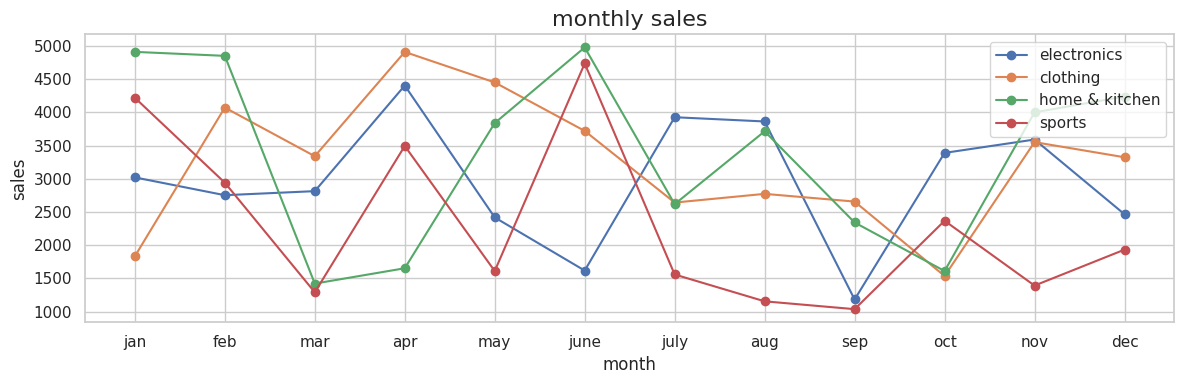

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,4))
for c in colm:
    plt.plot(sales_df.index, sales_df[c], marker='o', label=c)
plt.title("monthly sales", fontsize='16')
plt.xlabel("month")
plt.ylabel("sales")
plt.tight_layout()
plt.legend()
plt.show()

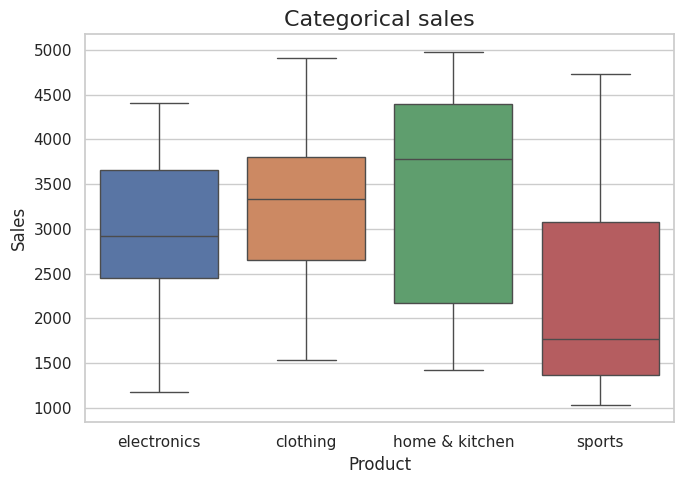

In [11]:
plt.figure(figsize=(7,5))
sns.boxplot(data=sales_df[colm])
plt.title('Categorical sales', fontsize=16)
plt.xlabel('Product')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

Q.2 For the array: array = np.array([[1, -2, 3],[-4, 5, -6]])
    i. Find element-wise absolute value
   ii. Find the 25th, 50th, and 75th percenƟle of flaƩened array, for each column, for each row.
  iii. Mean, Median and Standard DeviaƟon of flaƩened array, of each column, and each row

In [12]:

array = np.array([[ 1,-2, 3],
                  [-4, 5,-6]])
abs_arr = np.abs(array)
print(abs_arr)

[[1 2 3]
 [4 5 6]]


In [13]:
arr_1d = array.flatten()
percentiled = np.percentile(arr_1d, [25,50,75])
print("Flattened array perenctiles: ", percentiled)

percentiled_colm = np.percentile(array, [25,50,75], axis=0)
print("Column wise array perenctiles: ", percentiled_colm)

percentiled_row = np.percentile(array, [25,50,75], axis=1)
print("Row wise array perenctiles: ", percentiled_row)

Flattened array perenctiles:  [-3.5 -0.5  2.5]
Column wise array perenctiles:  [[-2.75 -0.25 -3.75]
 [-1.5   1.5  -1.5 ]
 [-0.25  3.25  0.75]]
Row wise array perenctiles:  [[-0.5 -5. ]
 [ 1.  -4. ]
 [ 2.   0.5]]


In [14]:
mean_flat = np.mean(arr_1d)
median_flat = np.median(arr_1d)
std_flat = np.std(arr_1d)
print(f"Flattened arr mean:{mean_flat}, median:{median_flat}, standard dev:{std_flat}")

mean_flat = np.mean(array, axis=0)
median_flat = np.median(array, axis=0)
std_flat = np.std(array, axis=0)
print(f"Column wise arr mean:{mean_flat}, median:{median_flat}, standard dev:{std_flat}")

mean_flat = np.mean(array, axis=1)
median_flat = np.median(array, axis=1)
std_flat = np.std(array, axis=1)
print(f"Row wise arr mean:{mean_flat}, median:{median_flat}, standard dev:{std_flat}")

Flattened arr mean:-0.5, median:-0.5, standard dev:3.8622100754188224
Column wise arr mean:[-1.5  1.5 -1.5], median:[-1.5  1.5 -1.5], standard dev:[2.5 3.5 4.5]
Row wise arr mean:[ 0.66666667 -1.66666667], median:[ 1. -4.], standard dev:[2.05480467 4.78423336]


Q.3 for array : a = np.array([-1.8, -1.6, -0.5, 0.5,1.6, 1.8, 3.0])
 i. Find floor, ceiling and truncate

In [15]:
a = np.array([-1.8, -1.6, -0.5, 0.5,1.6, 1.8, 3.0])
floor_val=np.floor(a)
ceil_val=np.ceil(a)
trunc_val=np.trunc(a)
print(f"Floor vals: {floor_val}, \nceiling vals: {ceil_val}, \ntruncated vals: {trunc_val}")

Floor vals: [-2. -2. -1.  0.  1.  1.  3.], 
ceiling vals: [-1. -1. -0.  1.  2.  2.  3.], 
truncated vals: [-1. -1. -0.  0.  1.  1.  3.]


Q.4 WAP to swap two elements in a list in Python Using a Temporary Variable.

In [16]:
my_list = [10, 20, 30, 40, 50]
i = 1
j = 3
temp = my_list[i]
my_list[i] = my_list[j]
my_list[j] = temp
print("New list:", my_list)

New list: [10, 40, 30, 20, 50]


Q.5 Write a Python program to swap two elements in a set by converƟng it to a list first.

In [18]:
my_set = {10, 20, 30, 40, 50}
my_list = list(my_set)
i = 0
j = 2
temp = my_list[i]
my_list[i] = my_list[j]
my_list[j] = temp
my_set_swapped = set(my_list)
print("Set :", my_set_swapped)

Set : {40, 10, 50, 20, 30}
